# Remake EXPRES Data Structures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wobble

from glob import glob
from tqdm import tqdm

## HD 101501

In [2]:
obs_files = glob('../data/101501/101501_*.fits')
data = wobble.Data()
for file_name in tqdm(obs_files):
    spec = wobble.Spectrum()
    try:
        spec.from_EXPRES(file_name,
                         rv_file_name='../data/101501.txt')
    except:
        print(file_name)
        continue
    data.append(spec)

  0%|          | 0/48 [00:00<?, ?it/s]/Users/lzhao/Documents/wobble/wobble/data.py:623: RuntimeWarning: invalid value encountered in less
  bad = np.logical_or(ts<0.001, ~np.isfinite(ts))
/Users/lzhao/Documents/wobble/wobble/data.py:376: RuntimeWarning: invalid value encountered in less
  bad = np.logical_or(self.ys[r] < min_flux, ~np.isfinite(self.ys[r]))
 25%|██▌       | 12/48 [00:05<00:15,  2.40it/s]

../data/peg51/217014_190618.1139.fits


 31%|███▏      | 15/48 [00:06<00:12,  2.60it/s]

../data/peg51/217014_190923.1127.fits


100%|██████████| 48/48 [00:26<00:00,  1.75it/s]


In [3]:
data.write('../data/101501_expres.hdf5')

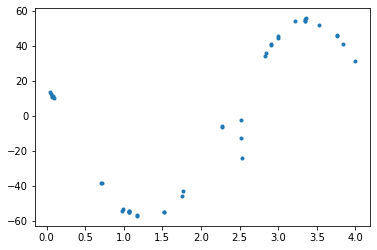

In [4]:
data = wobble.Data('../data/101501_expres.hdf5')
plt.xlabel('Time [mjd]')
plt.ylabel('RV [m/s]')
plt.plot(data.dates, data.pipeline_rvs+data.bervs,'.')